In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [130]:
data = pd.read_csv(
    "C:/Users/trngd/InternalDoc/code_projects/python-k-nearest-neighbors/dataset.csv"
)

data = data.drop(columns=["Unnamed: 32"], errors="ignore")

X = data.drop(columns=["id", "diagnosis"]).to_numpy()
y = data["diagnosis"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [131]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

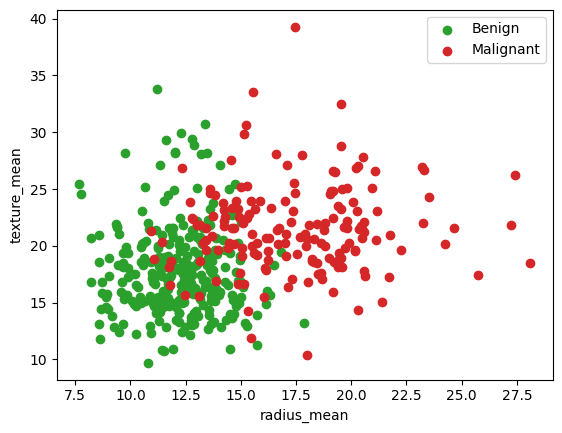

In [132]:
benign_points = X_train[y_train == "B"]
malignant_points = X_train[y_train == "M"]

plt.scatter(benign_points[:, 0], benign_points[:, 1], color="tab:green", label="Benign")
plt.scatter(
    malignant_points[:, 0], malignant_points[:, 1], color="tab:red", label="Malignant"
)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [133]:
# Euclidean Distance Function
def euclidean_dist(a, b):
    return np.sqrt(np.sum((b - a) ** 2))

In [134]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, new_points):
        predictions = [self.predict_class(new_point) for new_point in new_points]
        return np.array(predictions)

    def predict_class(self, new_point):
        distances = [euclidean_dist(point, new_point) for point in self.X_train]

        k_nearest_indices = np.argsort(distances)[: self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common_label

In [142]:
k = 11
knn = KNN(k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy for k({k}): {accuracy:.2f}%")

Accuracy for k(11): 98.25%


<function matplotlib.pyplot.show(close=None, block=None)>

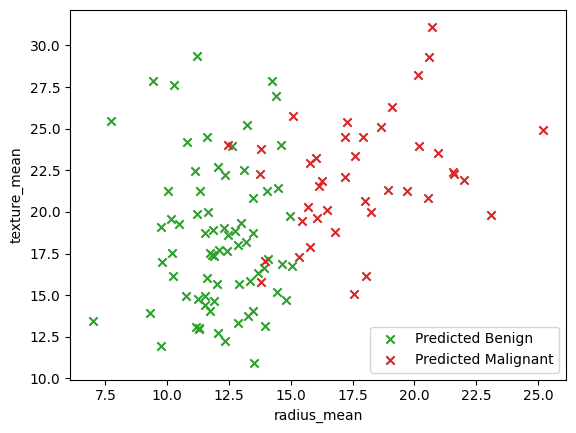

In [143]:
predicted_benign = X_test[predictions == "B"]
predicted_malignant = X_test[predictions == "M"]
plt.scatter(
    predicted_benign[:, 0],
    predicted_benign[:, 1],
    color="tab:green",
    label="Predicted Benign",
    marker="x",
)
plt.scatter(
    predicted_malignant[:, 0],
    predicted_malignant[:, 1],
    color="tab:red",
    label="Predicted Malignant",
    marker="x",
)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show